# Notebook-III: Visualizing AI Tutor Performance with the AITutor-AssessmentKit  

This notebook provides an interactive guide to visualizing and interpreting the evaluation metrics of AI tutors using the [AITutor-AssessmentKit]() framework. Through the use of various statistical and graphical techniques, this notebook aims to provide an in-depth analysis of tutor performance across pedagogical dimensions, helping users make informed assessments.  

## Key Features  

- **Modular Visualization Framework**:  
  Designed to explore, compare, and analyze evaluation metrics for AI tutors across multiple pedagogical dimensions.  

- **Evaluation Score Extraction**:  
  Extract and organize human, automated, and LLM-based evaluation scores, with options for normalization and aggregation to provide a clear and consistent view of the data.  

- **Comprehensive Label Distribution Analysis**:  
  Visualize the distribution of evaluation labels for selected dimensions using customizable boxplots and vilion.  

- **Spider Plot Comparisons**:  
  Generate spider plots to compare tutor performance across dimensions, offering a quick and intuitive overview of strengths and weaknesses.  

- **Correlation Analysis**:  
  Assess relationships between human and automated scores using statistical Spearman correlations, accoracy and visualization plot. 

- **Interpretability and Insights**:  
  Generate interpretability plots and detailed performance reports to uncover actionable insights into tutor behavior and evaluation trends.  

- **Interactive User Interface**:  
  Explore evaluation data interactively, allowing for detailed examination of tutor responses, corresponding annotations, and comparisons across evaluation types.  
 

## Objectives  

By the end of this tutorial, you will:  
1. Learn how to extract and process evaluation human, automated and llm evaluation scores for AI tutors.  
2. Visualize and interpret the distribution of evaluation labels for pedagogical dimensions.  
3. Compare tutor performance across selected dimensions using advanced visualization techniques.  
4. Perform correlation analysis to study the agreement between human, automated, and LLM-based evaluations.  
5. Generate interpretability and spider plots to highlight key performance trends and insights.  

This hands-on notebook is designed to equip you with the necessary tools to evaluate and visualize AI tutor performance effectively. It emphasizes understanding evaluation metrics and identifying areas for improvement to enhance the educational capabilities of AI systems.

## **Overview of the `Visualizer` Module**

The `Visualizer` class is designed for analyzing and visualizing the evaluation scores from human, automated, and LLM assessments. It provides various methods to compute and visualize evaluation metrics across different tutor models, dimensions, and evaluation types. This module is essential for comparing and interpreting performance across multiple evaluation scenarios.

| Method Name                         | Functionality                                                       | How to Call                                        |
|-------------------------------------|---------------------------------------------------------------------|---------------------------------------------------|
| `__init__`                          | Initializes the Visualizer with input/output directories and tutor models. | `__init__(input_data_dir, output_data_dir, ...)`    |
| `get_evaluation_scores`             | Extracts and organizes evaluation scores for human, automated, and LLM evaluations. | `get_evaluation_scores(normalize=False)`          |
| `get_average_evaluation_scores`     | Computes average evaluation scores for human, automated, and LLM assessments. | `get_average_evaluation_scores(normalize=False)`   |
| `get_evaluation_report`             | Generates a report based on evaluation type and normalization flag.  | `get_evaluation_report(evaluation_type, normalize)` |
| `label_distribution_plot`           | Plots the distribution of scores for a specific evaluation dimension. | `label_distribution_plot(dimension, normalize)`    |
| `spider_plot`                       | Creates a spider plot to visualize LLM evaluation scores across dimensions. | `spider_plot(normalize, evaluation_type, ...)`     |
| `compare_spider_plot`               | Generates a comparison spider plot between LLM evaluation scores across different dimensions. | `compare_spider_plot(normalize, evaluation_dim, ...)` |
| `_spearman_bootstrap_ci`            | Computes Spearman’s correlation with bootstrapped confidence intervals. | `_spearman_bootstrap_ci(model_scores, human_labels)` |
| `_compute_accuracy`                 | Calculates the accuracy between ground truth and predicted values.  | `_compute_accuracy(ground_truth, predictions)`     |
| `_clean_scores_jointly`             | Cleans human and automated scores by removing None values and ensuring equal lengths. | `_clean_scores_jointly(hscores, ascores)`          |
| `performance_report`                | Generates a performance report with metrics such as correlation.    | `performance_report(normalize, metric, ...)`       |
| `plot_correlation`                  | Plots the correlation between evaluation types across dimensions.  | `plot_correlation(normalize, correlation_with, ...)` |
| `_plot_binned_heatmap`              | Creates a heatmap for binned continuous evaluation values.         | `_plot_binned_heatmap(discrete_values, ...)`       |
| `interpretability_plot`             | Plots a binned heatmap for score interpretation across dimensions. | `interpretability_plot(normalize, bins, ...)`      |
| `user_interaction`                  | Displays an interactive interface for exploring and comparing evaluations. | `user_interaction(normalize)`                      |

## **Installation**

Let's install the `AITutor-AssessmentKit` with `pip`

In [16]:
!pip install AITutor-AssessmentKit

In [17]:
import os
import sys

# Set the CUDA device for execution
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(".."))

# Import required libraries
from aitutor_assessmentkit.visualizer import Visualizer
#helper imports 
from aitutor_assessmentkit.helpers import utils

## **Data: `MRBench` Data with Evaluation  Scores**
Let's download the sample `MRBench` dataset with human, automated and LLMbased evaluaiton scores. 

In [18]:
%%bash

# Download the required files from GitHub
wget -q "https://raw.githubusercontent.com/kaushal0494/aitutor_assessmentkit/main/data/sample_mrbench_out.json"

# Create the necessary directories if they don't exist
mkdir -p ../data
mkdir -p ../outputs

# Move the downloaded files to the 'data' directory
mv sample_mrbench_out.json ../data/

In [19]:
utils.load_data('../data/sample_mrbench_out.json')

,conversation_id,conversation_history,Data,Split,Topic,Ground_Truth_Solution,anno_llm_responses
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"||| ||| ||| ||| ||| tutor: hi, could you pleas...",MathDial,test,Not Available,elliott took half of his steps on his school j...,{'Gemini': {'response': 'it looks like you're ...
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"||| ||| ||| ||| ||| tutor: hi, could you pleas...",MathDial,test,Not Available,there are a total of 26 - 2 = 24 pencils in th...,{'Sonnet': {'response': 'i appreciate your eff...
2,2895106109,||| ||| ||| ||| ||| tutor: examples: triangles...,Bridge,train,4.5A.Geometric Lines,not available,"{'Llama31405B': {'response': 'that's close, bu..."
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"||| ||| ||| ||| ||| tutor: hi, could you pleas...",MathDial,test,Not Available,there are a total of 26 - 2 = 24 pencils in th...,{'Llama31405B': {'response': 'let's re-examine...
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"||| ||| ||| ||| ||| tutor: hi, could you pleas...",MathDial,test,Not Available,she got 5 gift cards because 50 / 10 = 5\nshe ...,{'Expert': {'response': 'ok. and if she got 5 ...
5,290101923,||| ||| ||| ||| ||| tutor: a quadrilateral is ...,Bridge,test,4.6D.Classifying 2D Figures,not available,{'Expert': {'response': 'great try - you shoul...


In [20]:
utils.load_json_data('../data/sample_mrbench_out.json')

Loaded 6 examples from ../data/sample_mrbench_out.json


[{'conversation_id': '930-b01cb51d-748d-460c-841a-08e4d5cd5cc7',
  'conversation_history': '||| ||| ||| ||| ||| tutor: hi, could you please provide a step-by-step solution for the question below? the question is: elliott is trying to walk 10,000 steps a day. he finished half of his steps on his walks to and from school and did another 1,000 steps going for a short walk with his friend. he also went for a short jog around the block and realized that after he had finished his jog, he only had 2,000 steps left to take. how many steps did elliott take during his jog? ||| ||| ||| student: elliott finished half of his steps on his walks to and from school, so he took 10,000/2 = 5000 steps during these walks.\nadding the 1,000 steps he took with his friend, he has taken 5000+1000 = 6000 steps.\nsubtracting 6000 from his goal of 10,000, he has 10,000-6000 = 4000 steps left to take.\ntherefore, he took 4000 steps during his jog.\n4000 ||| ||| ||| tutor: can you tell me how you got to your answe

In [21]:
visualizer = Visualizer(
    file_names=['../data/sample_mrbench_out.json'],
    output_data_dir='../outputs',
    tutor_models=['Novice', 'Expert', 'Llama31405B', 'GPT4', 'Sonnet', 
                  'Phi3', 'Llama318B', 'Mistral', 'Gemini'],
)

Loading Annotated data: 100%|██████████| 1/1 [00:00<00:00, 1830.77it/s]

Loaded 6 examples from ../data/sample_mrbench_out.json


### Retrieve and Display Evaluation Scores 

In [22]:
#Retrieve and display evaluation scores 
score_dict = visualizer.get_evaluation_scores(normalize=True)
print("human evaluation scores across all Tutor Models:", score_dict['human_evaluation_scores'])
print("llm evaluation scores across all Tutor Models:", score_dict['auto_evaluation_scores'])
print("llm evaluation scores across all Tutor Models:", score_dict['llm_evaluation_scores'])


human evaluation scores across all Tutor Models: {'Novice': {'Mistake_Identification': [1, 1], 'Mistake_Location': [0, 1], 'Revealing_of_the_Answer': [0, 1], 'Providing_Guidance': [0, 1], 'Actionability': [0, 0], 'Coherence': [0.5, 1], 'Tutor_Tone': [0.5, 0.5], 'Humanlikeness': [0, 1], 'Overall_tutors': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0.5, 1, 0.5, 0.5, 0, 1]}, 'Expert': {'Mistake_Identification': [1, 0, 1, 1, 1, 1], 'Mistake_Location': [1, 0, 1, 0.5, 1, 1], 'Revealing_of_the_Answer': [0, 0, 0, 0, 0, 0], 'Providing_Guidance': [1, 0, 1, 0, 1, 0.5], 'Actionability': [1, 0, 0.5, 1, 1, 1], 'Coherence': [1, 0, 1, 1, 1, 0.5], 'Tutor_Tone': [0.5, 0.5, 1, 0.5, 0.5, 1], 'Humanlikeness': [1, 1, 1, 1, 1, 1], 'Overall_tutors': [1, 0, 1, 1, 1, 1, 1, 0, 1, 0.5, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0.5, 1, 0, 0.5, 1, 1, 1, 1, 0, 1, 1, 1, 0.5, 0.5, 0.5, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1]}, 'Llama31405B': {'Mistake_Identification': [1, 1, 1, 1, 1, 1], 'Mistake_Location': [1, 1, 1, 1, 1, 1], 'Revealing_o

In [23]:
# Retrieve and display average evaluation scores 
score_dict = visualizer.get_average_evaluation_scores(normalize=True)
print("Average human evaluation scores across all Tutor Models:", score_dict['human_avg_scores'])
print("Average auto evaluation scores across all Tutor Models:", score_dict['auto_avg_scores'])
print("Average LLM evaluation scores across all Tutor Models:", score_dict['llm_avg_scores'])

Average human evaluation scores across all Tutor Models: {'Novice': {'Mistake_Identification': 1.0, 'Mistake_Location': 0.5, 'Revealing_of_the_Answer': 0.5, 'Providing_Guidance': 0.5, 'Actionability': 0.0, 'Coherence': 0.75, 'Tutor_Tone': 0.5, 'Humanlikeness': 0.5, 'Overall_tutors': 0.531}, 'Expert': {'Mistake_Identification': 0.833, 'Mistake_Location': 0.75, 'Revealing_of_the_Answer': 0.0, 'Providing_Guidance': 0.583, 'Actionability': 0.75, 'Coherence': 0.75, 'Tutor_Tone': 0.667, 'Humanlikeness': 1.0, 'Overall_tutors': 0.667}, 'Llama31405B': {'Mistake_Identification': 1.0, 'Mistake_Location': 1.0, 'Revealing_of_the_Answer': 0.167, 'Providing_Guidance': 0.917, 'Actionability': 0.833, 'Coherence': 1.0, 'Tutor_Tone': 0.583, 'Humanlikeness': 0.667, 'Overall_tutors': 0.771}, 'GPT4': {'Mistake_Identification': 0.833, 'Mistake_Location': 0.833, 'Revealing_of_the_Answer': 0.333, 'Providing_Guidance': 0.75, 'Actionability': 0.5, 'Coherence': 0.833, 'Tutor_Tone': 0.75, 'Humanlikeness': 1.0, 'Ov

In [24]:
visualizer.get_evaluation_reprot(evaluation_type='humeval', normalize=True)

,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
Novice,1.000,0.500,0.500,0.500,0.000,0.750,0.500,0.500,0.531
Expert,0.833,0.750,0.000,0.583,0.750,0.750,0.667,1.000,0.667
Llama31405B,1.000,1.000,0.167,0.917,0.833,1.000,0.583,0.667,0.771
GPT4,0.833,0.833,0.333,0.750,0.500,0.833,0.750,1.000,0.729
Sonnet,0.917,0.750,0.000,0.833,0.750,0.917,0.750,1.000,0.740
Phi3,0.583,0.500,0.417,0.417,0.167,0.500,0.667,0.500,0.469
Llama318B,0.833,0.667,0.333,0.667,0.333,0.917,0.583,1.000,0.667
Mistral,1.000,1.000,0.333,0.917,0.750,0.750,0.583,1.000,0.792
Gemini,0.917,0.583,0.167,0.667,0.667,0.833,0.667,1.000,0.688


### Scores  Distribution Plots

/home/kaushal.maurya/miniconda3/envs/test_toolkit/lib/python3.10/site-packages/aitutor_assessmentkit/visualizer/visualizer.py:294: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Source", y="Score", data=plot_df, palette="Set3", inner="quartile")  # Create the violin plot


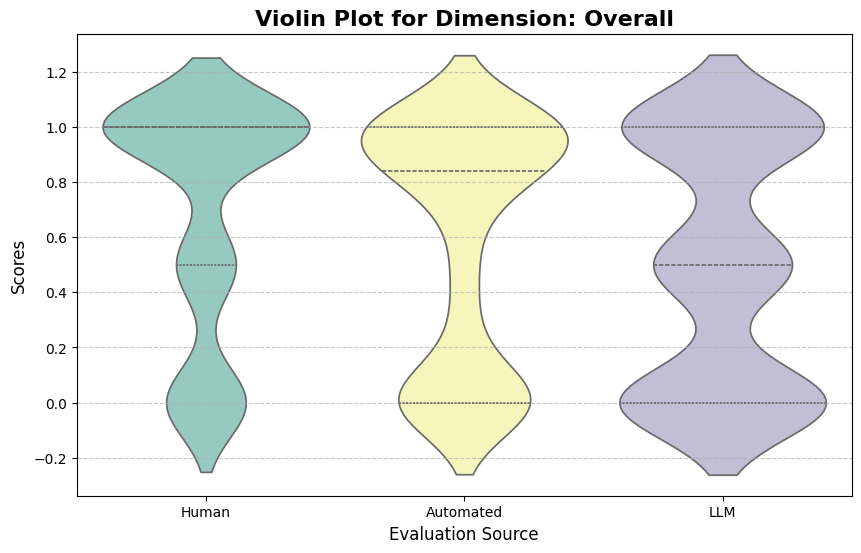

Violin plot successfully saved at: ../outputs/label_distribution.png


In [25]:
visualizer.label_distribution_plot(dimension="Overall", normalize=True, plot_type='violin')

/home/kaushal.maurya/miniconda3/envs/test_toolkit/lib/python3.10/site-packages/aitutor_assessmentkit/visualizer/visualizer.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Source", y="Score", data=plot_df, palette="Set2")  # Create the boxplot


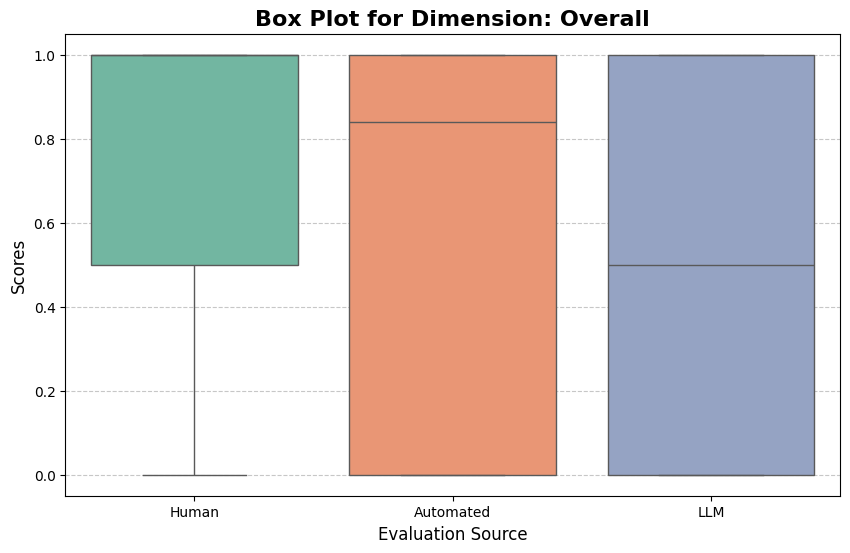

Box plot successfully saved at: ../outputs/label_distribution.png


In [26]:
visualizer.label_distribution_plot(dimension="Overall", normalize=True, plot_type='box')

## Spider Plots to Compare the Evaluation Scores 

Spider plot saved at: ../outputs/spider_plot.png


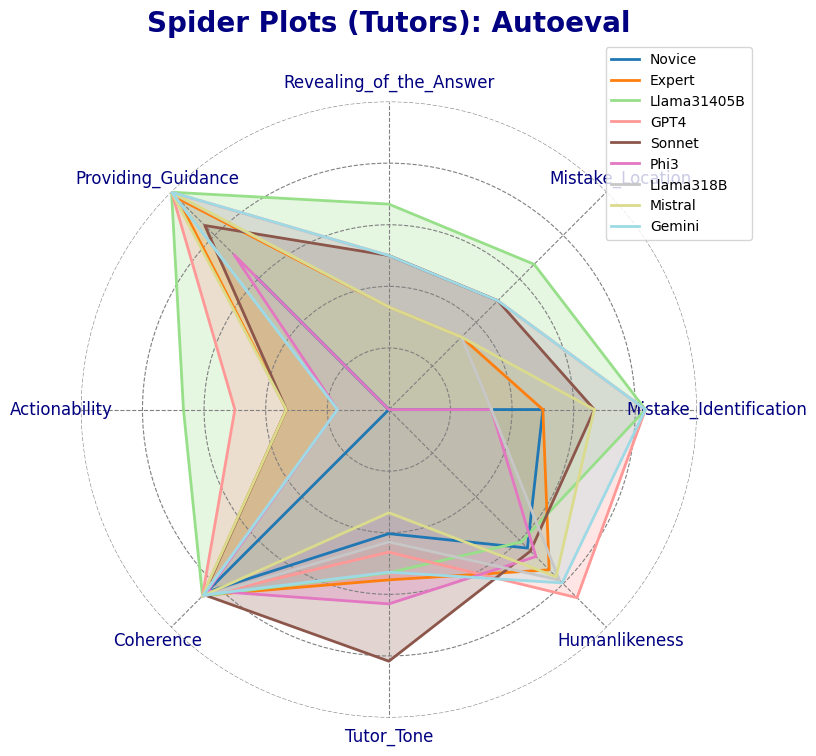

In [27]:
visualizer.spider_plot(normalize=True, evaluation_type='autoeval', plot_type="tutor")


Spider plot saved at: ../outputs/spider_plot.png


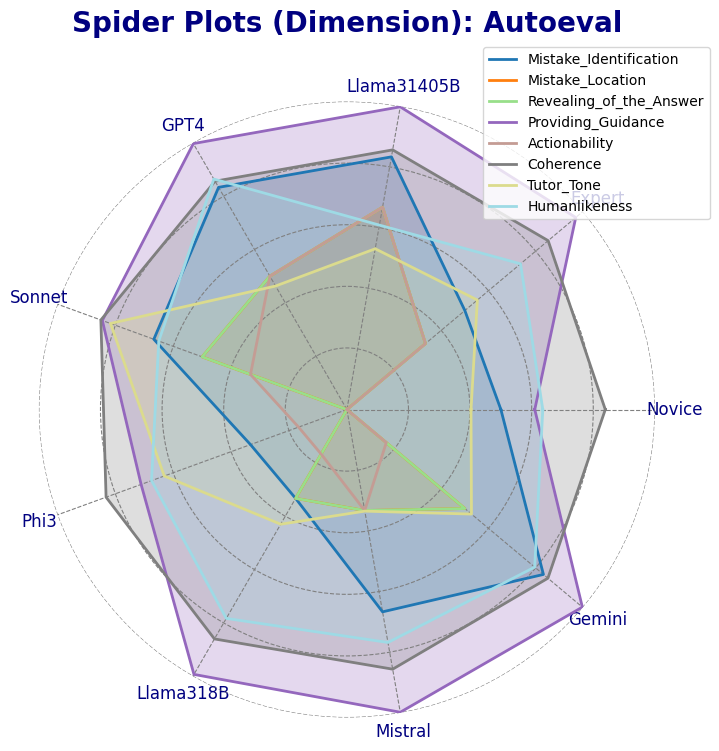

In [28]:
visualizer.spider_plot(normalize=True, evaluation_type='autoeval', plot_type="dimension")

Spider plot saved at: ../outputs/compare_spider.png


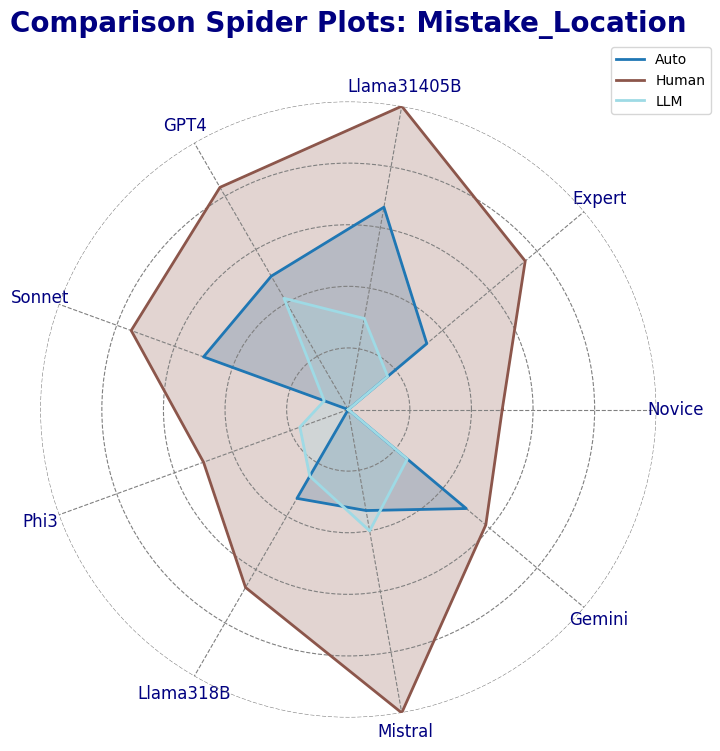

In [29]:
# Compare spider plots for a specific evaluation dimension
visualizer.compare_spider_plot(normalize=True, evaluation_dim='Mistake_Location')

### Generate interpretability plots
Interpretability plot bewtween discreate human evalution scores and continuous evalution scores


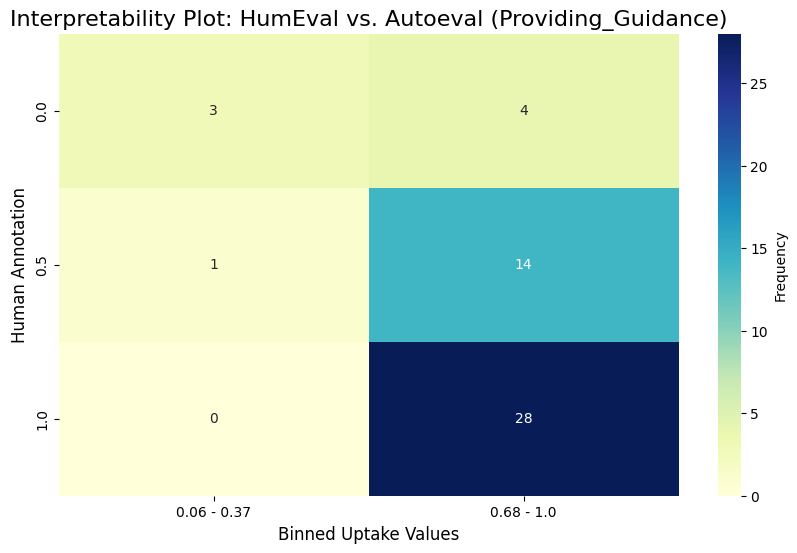

Plot saved at ../outputs/interpretability_plot.png


<Figure size 640x480 with 0 Axes>

In [30]:
visualizer.interpretability_plot(normalize=True, bins=3, interpwith='autoeval', evaluation_dim='Providing_Guidance')

### Generate Performance Reports 

In [31]:
# Generate performance reports with metrics such as correlation or accuracy
overall, report = visualizer.peformance_report(normalize=True, metric="correlation",  correlation_with="autoeval")
print(overall)
report

0.21


,Tutor,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
0,Novice,NaN,NaN,NaN,1.000,NaN,1.000,NaN,1.000,0.379
1,Expert,-0.447,-0.367,NaN,-0.127,0.490,-0.101,0.621,NaN,0.016
2,Llama31405B,NaN,NaN,0.316,0.775,0.632,NaN,-0.655,0.000,0.235
3,GPT4,-0.200,-0.447,0.000,0.020,0.333,-0.399,-0.293,NaN,0.010
4,Sonnet,-0.316,0.115,NaN,0.220,0.490,0.655,-0.488,NaN,0.089
5,Phi3,0.224,NaN,NaN,0.802,-0.200,0.878,0.000,-0.488,0.167
6,Llama318B,0.316,0.500,0.250,0.707,0.632,-0.266,-0.655,NaN,0.381
7,Mistral,NaN,NaN,0.250,1.000,-0.122,-0.169,-0.655,NaN,0.172
8,Gemini,-0.200,0.211,0.447,0.500,0.424,-0.828,0.414,NaN,0.219
9,Overall_dim,0.016,0.124,0.052,0.449,0.403,0.179,0.008,0.066,0.210


In [32]:
overall, report = visualizer.peformance_report(normalize=True, metric="accuracy",  correlation_with="autoeval")
print(overall)
report

0.278


,Tutor,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
0,Novice,0.500,0.500,0.500,0.0,1.000,0.0,0.0,0.0,0.312
1,Expert,0.333,0.167,0.667,0.0,0.500,0.0,0.0,0.0,0.208
2,Llama31405B,0.833,0.667,0.500,0.0,0.833,0.0,0.0,0.0,0.354
3,GPT4,0.667,0.333,0.500,0.0,0.667,0.0,0.0,0.0,0.271
4,Sonnet,0.500,0.500,0.500,0.0,0.500,0.0,0.0,0.0,0.250
5,Phi3,0.500,0.500,0.500,0.0,0.667,0.0,0.0,0.0,0.271
6,Llama318B,0.500,0.667,0.667,0.0,0.833,0.0,0.0,0.0,0.333
7,Mistral,0.667,0.333,0.667,0.0,0.333,0.0,0.0,0.0,0.250
8,Gemini,0.667,0.500,0.667,0.0,0.333,0.0,0.0,0.0,0.271
9,Overall_dim,0.580,0.460,0.580,0.0,0.600,0.0,0.0,0.0,0.278


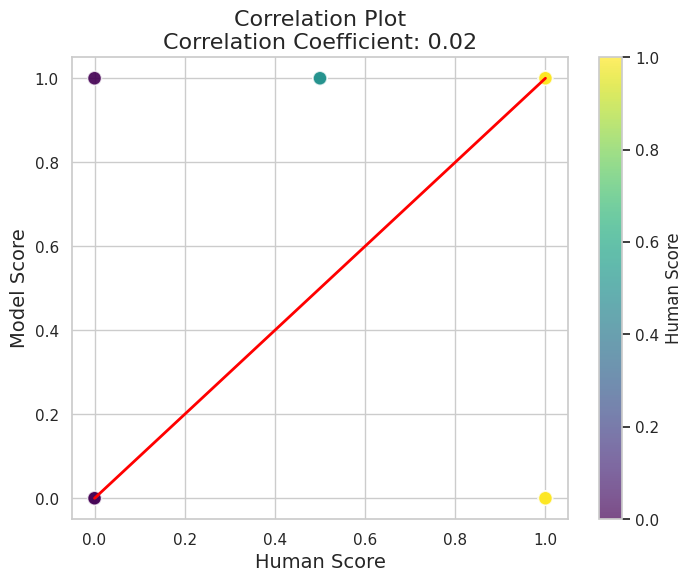

Correlation plot saved at: ../outputs/correlation_plot.png


<Figure size 640x480 with 0 Axes>

In [33]:
# Generate correlation plots for specific evaluation dimensions
visualizer.plot_correlation(normalize=True, correlation_with="autoeval", 
                            dimension="Mistake_Identification", plot_name="correlation_plot.png")

### User Interaction Mode

In [34]:
# Interactive exploration of the evaluation data
visualizer.user_interaction(normalize=True)

Conversation Topic: Not Available
Conversation History:
Tutor: hi, could you please provide a step-by-step solution for the question below? the question is: jam has three boxes full of pencils and 2 loose pencils which give a total of 26 pencils. if her sister, meg, has 46 pencils, how many boxes do jam and meg need to store all their pencils? 
student: jam has 26 - 2 = 24 pencils in her boxes.
together, jam and meg have 24 + 46 = 70 pencils.
each box holds 24 pencils, so they need 70/24 = 2.92 boxes.
since they can't have a fraction of a box, they need to round up to the nearest whole number of boxes.
therefore, they need 3 boxes to store all their pencils.
3 
tutor: can you walk me through your solution? 
student: sure! i started by figuring out how many pencils jam had in her boxes. she had 3 boxes with 26 pencils in total but 2 of those were loose so i subtracted 2 from 26 to get 24. then i added the 24 pencils that jam had to the 46 pencils that meg had to get a total of 70 pencil

,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Humanlikeness,Coherence,Tutor_Tone
0,3,1,2,1,2,1,2,1
